In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from pandas import Series
import statsmodels.api as sm
import scipy

# Question 1

### For a time series plot to be stationary, its properties should not vary with time ie, mean, variance should be constant over time. There should be no predictable patterns, or trends (like increasing or decreasing), not seasonalities (systematic repeating components in the time series). The plot should be roughly horizontal. n the given 9 plots, we see that a, has an increasing trend, c has a decreasing, followed by increasing, followed by decreasing trend. e has a decreasing trend, i has both an increasing trend and increasing variance. f has increasing then decreasing then againt increasing trends. d and h have a repeating component thus are examples of seasonality. The stationary examples are b and g.

# Question 2

In [3]:
amazon = pd.read_csv("AMZN.csv")
microsoft = pd.read_csv("MSFT.csv")
google = pd.read_csv("GOOG.csv")

### Since the prices and trends in stock market are assessed by the Close prices, only those prices are considered

In [4]:
amazon_close = amazon["Close"]
microsoft_close = microsoft["Close"]
google_close = google["Close"]

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 1.20729204e-03  0.00000000e+00  4.54545455e-02]
 [ 0.00000000e+00  6.88475741e-04 -4.49607710e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00120729  0.          0.04545455]
 [ 0.          0.01056223 -0.56842208]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00120729  0.          0.04545455]
 [ 0.          0.0016412  -1.16259657]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    53.45]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


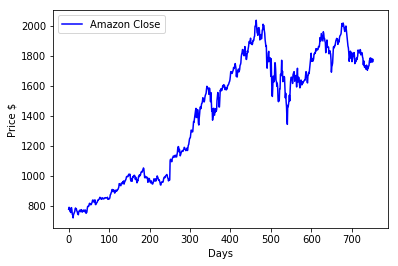

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    47.2 ]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


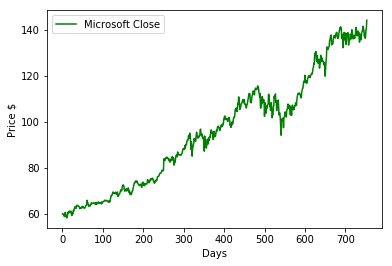

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    53.45]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


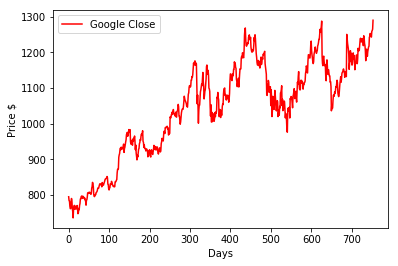

In [5]:
plt.figure()
plt.plot(amazon_close, color="b", label="Amazon Close")
plt.xlabel("Days")
plt.ylabel("Price $")
plt.legend()

plt.figure()
plt.plot(microsoft_close, color="g", label="Microsoft Close")
plt.xlabel("Days")
plt.ylabel("Price $")
plt.legend()

plt.figure()
plt.plot(google_close, color="r", label="Google Close")
plt.xlabel("Days")
plt.ylabel("Price $")
plt.legend()

### From the plots, we can see that all plots have either trend or seasonality, and are non horizontal with variable mean and variance, due to which they are all non stationary.
### All the prices have increased in the 3 years hence the health of stock prices has increased by more than double. We see that prices for Microsoft is lower compared to Google which is lesser than Amazon Close prices

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.0012089  0.         0.04424565]
 [0.         0.00339365 0.51839363]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.0012089  0.         0.04424565]
 [0.         0.07158198 0.48210447]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.0012089  0.         0.04424565]
 [0.         0.00418184 0.45987508]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     41.575]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


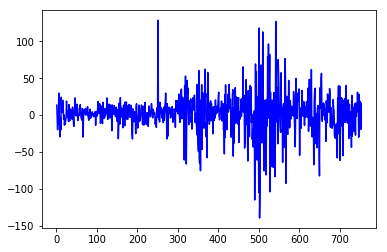

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    28.95]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


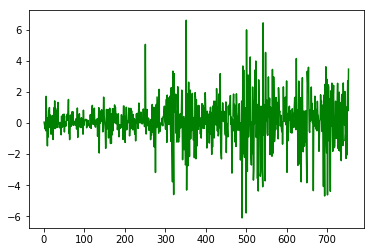

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    41.45]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


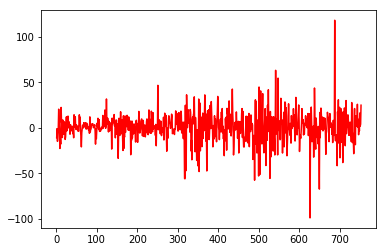

In [38]:
diff_amazon = amazon_close.diff()[1:]
plt.plot(diff_amazon, color="b")
plt.figure()
diff_microsoft = microsoft_close.diff()[1:]
plt.plot(diff_microsoft, color="g")
plt.figure()
diff_google = google_close.diff()[1:]
plt.plot(diff_google, color="r")

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00132802  0.         -0.00132802]
 [ 0.          0.5         0.5       ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00132802  0.         -0.00132802]
 [ 0.          0.5         0.5       ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00132802  0.         -0.00132802]
 [ 0.          0.5         0.5       ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     58.825]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


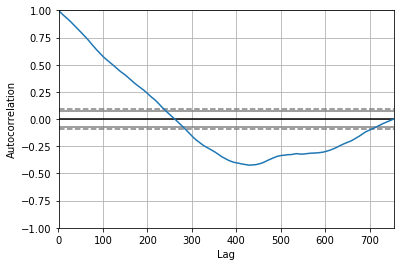

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     58.825]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


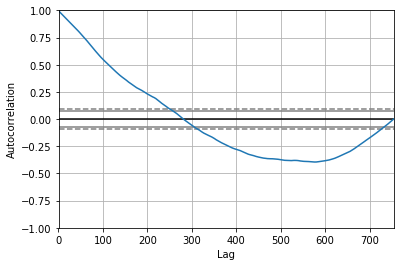

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     58.825]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


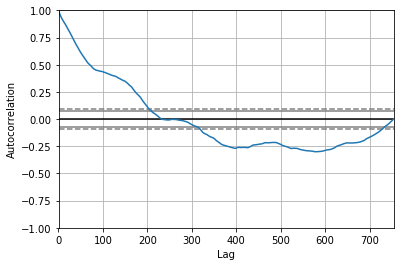

In [39]:
plt.figure()
autocorrelation_plot(amazon["Close"].values.tolist())
plt.figure()
autocorrelation_plot(microsoft["Close"].values.tolist())
plt.figure()
autocorrelation_plot(google["Close"].values.tolist())

### For Amazon, there is positive correlation till around a lag of 250, followed by negative correlation. For Microsoft, there is positive correlation a little longer, till about 280-290, and for Google, there is positive correlation till around 230, followed by 0 correlation till lag of around 270, followed by negative correlation. 
### From these autocorrelation plots, we can find the best lag as p value for our ARMA model. We see that for Amazon, the correlationis positive till around lag of 250, significant positive correlation is around 100, thus p for Amazon can be 100. For Microsoft and Google also, the pattern is almost simlar. So 100 is a safe choice of p for all the 3 datasets.

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.01818182 0.         0.04545455]
 [0.         0.90909091 0.04545455]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.01818182 0.         0.04545455]
 [0.         0.84621136 0.10833409]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.01818182 0.         0.04545455]
 [0.         0.90909091 0.04545455]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.01818182 0.         0.04545455]
 [0.         0.86702428 0.08752118]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.01818182 0.         0.04545455]
 [0.         0.

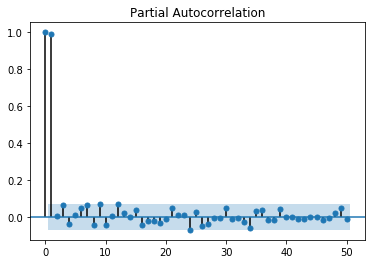

[[0.0180018  0.         0.04545455]
 [0.         0.55312799 0.40141747]
 [0.         0.         1.        ]]
[[0.0180018  0.         0.04545455]
 [0.         0.84621136 0.10833409]
 [0.         0.         1.        ]]
[[0.0180018  0.         0.04545455]
 [0.         0.55551001 0.39903544]
 [0.         0.         1.        ]]
[[0.0180018  0.         0.04545455]
 [0.         0.84852515 0.1060203 ]
 [0.         0.         1.        ]]
[[0.0180018  0.         0.04545455]
 [0.         0.57734039 0.37720507]
 [0.         0.         1.        ]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     44.825]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


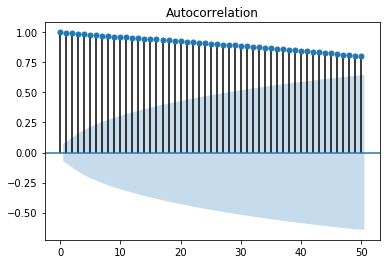

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     30.075]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


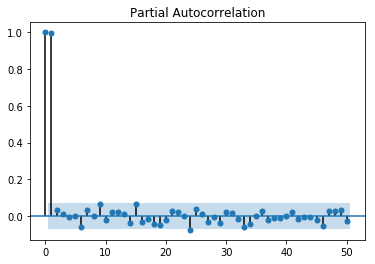

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     44.825]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


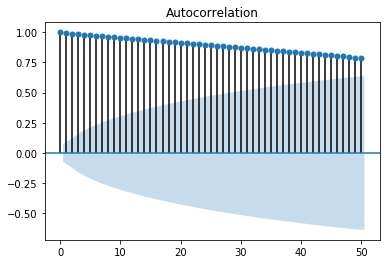

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     30.075]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


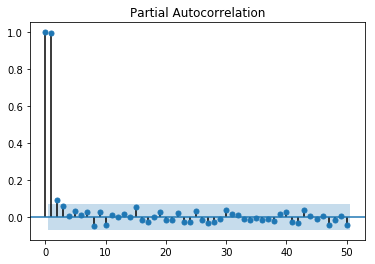

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    38.45]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


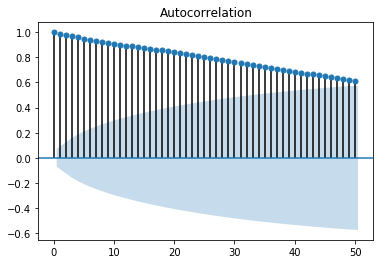

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     30.075]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


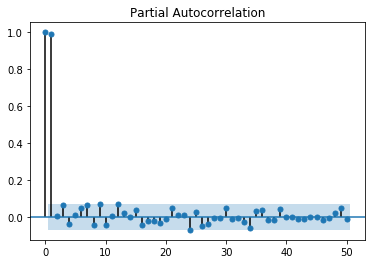

In [40]:
plot_acf(amazon["Close"].values.tolist(), lags=50)
plot_pacf(amazon["Close"].values.tolist(), lags=50)
plot_acf(microsoft["Close"].values.tolist(), lags=50)
plot_pacf(microsoft["Close"].values.tolist(), lags=50)
plot_acf(google["Close"].values.tolist(), lags=50)
plot_pacf(google["Close"].values.tolist(), lags=50)

## Stationarity

In [42]:
result = adfuller(amazon["Close"].values, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)

print()

result = adfuller(diff_amazon, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)
    
print()

result = adfuller(microsoft["Close"].values, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)

print()

result = adfuller(diff_microsoft, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)

print()

result = adfuller(google["Close"].values, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)

print()

result = adfuller(diff_google, autolag='AIC')
print('ADF Statistic:', result[0])
print('p value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key, value)

ADF Statistic: -1.3300806982824769
p value: 0.6153004935987266
Critial Values:
1% -3.4390641198617864
Critial Values:
10% -2.5688179819544312
Critial Values:
5% -2.8653859408474482

ADF Statistic: -28.084050785811527
p value: 0.0
Critial Values:
1% -3.439075747702915
Critial Values:
10% -2.568820711931304
Critial Values:
5% -2.8653910653234655

ADF Statistic: 0.2587408455368835
p value: 0.975370306741435
Critial Values:
1% -3.4391580196774494
Critial Values:
10% -2.5688400274762397
Critial Values:
5% -2.8654273226340554

ADF Statistic: -11.913681712414768
p value: 5.224813282748441e-22
Critial Values:
1% -3.4391580196774494
Critial Values:
10% -2.5688400274762397
Critial Values:
5% -2.8654273226340554

ADF Statistic: -1.5451544457296098
p value: 0.5110676968934357
Critial Values:
1% -3.4391937559530965
Critial Values:
10% -2.568848417404698
Critial Values:
5% -2.8654430713273373

ADF Statistic: -10.381824474784127
p value: 2.1292277185846426e-18
Critial Values:
1% -3.4391937559530965
C

### From the ADF test for Amazon, we obtain statistic score of -1.33. For a stationary data, this value should be more and more negative. Since -1.33 is much lower than any of the critical values (1%, 5%, 10%), we can reject the null hypothesis (non stationary) with higher than 10%. This means the data is more likely to be non stationary. For the ADF on the Amazon dataset converted to stationary, we see that the statistic is extremely negative indicating that the data is stationary. The observations are similar for Microsoft and Google which also have very less negative stat value, meaning they are non stationary

## ARMA

In [11]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return Series(diff)

In [12]:
len1 = int(len(amazon["Close"].values)/2)
len2 = int(len(microsoft["Close"].values)/2)
len3 = int(len(google["Close"].values)/2)
train_amazon = diff_amazon[1:len1]
train_microsoft = diff_microsoft[1:len2]
train_google = diff_google[1:len3]
test_amazon = diff_amazon[len1:]
test_microsoft = diff_microsoft[len2:]
test_google = diff_google[len3:]

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[2.41779497e-03 0.00000000e+00 4.54545455e-02]
 [0.00000000e+00 4.44538711e-04 6.73489227e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    61.95]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


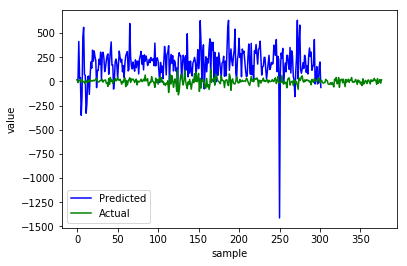

In [102]:
modelamazon = ARMA(train_amazon, (3,2))
modelamazon.fit()

plt.figure()
plt.plot(modelamazon.predict(test_amazon), color="b", label="Predicted")
plt.plot(test_amazon.values, color="g", label="Actual")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()

Text(0,0.5,'value')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.00610128 0.         0.04545455]
 [0.         0.05767779 0.60963208]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    49.2 ]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


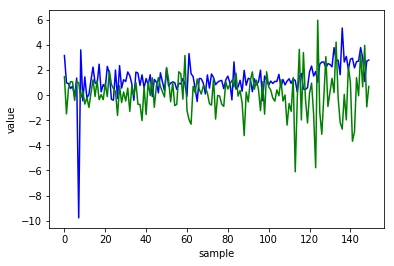

In [32]:
model = ARMA(train_microsoft, (3,2))
model.fit()

plt.figure()
plt.plot(model.predict(test_microsoft)[0:150], color="b")
plt.plot(test_microsoft.values[0:150], color="g")
plt.xlabel("sample")
plt.ylabel("value")

Text(0,0.5,'value')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[6.49350649e-02 0.00000000e+00 4.54545455e-02]
 [0.00000000e+00 7.11146206e-04 6.98773123e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    55.45]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


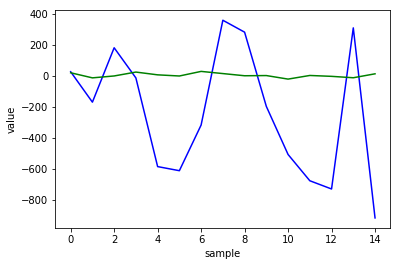

In [33]:
modelgoogle = ARMA(train_google, (3,2))
modelgoogle.fit()

plt.figure()
plt.plot(modelgoogle.predict(test_google)[0:15], color="b")
plt.plot(test_google.values[0:15], color="g")
plt.xlabel("sample")
plt.ylabel("value")

# Question 3

In [83]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1 * data
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2, len(a) - 1)
    return m, h

In [84]:
breast = pd.read_csv("breast-cancer-wisconsin.data", header=None)
breast = breast.dropna(axis = 0, how ='any')
breast = np.array(breast, dtype=int)

In [86]:
x = breast[:, 1:-1]
len4 = int(len(x)/2)
benormal = breast[:, -1]
x_train = x[0:len4]
y_train = benormal[0:len4]
x_test = x[len4:]
y_test = benormal[len4:]

### We know that number of benign are 458 (65.5%) and number of malignant are 241 (34.5%)

In [87]:
glm1 = sm.GLM(y_train, x_train, family=sm.families.Gamma())

c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [88]:
res = glm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  341
Model:                            GLM   Df Residuals:                      332
Model Family:                   Gamma   Df Model:                            8
Link Function:          inverse_power   Scale:                         0.54968
Method:                          IRLS   Log-Likelihood:                -793.70
Date:                Tue, 29 Oct 2019   Deviance:                       242.58
Time:                        22:15:25   Pearson chi2:                     182.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0204      0.005      4.389      0.0

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00266596  0.          0.04545455]
 [ 0.          0.05288114 -0.01642732]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     36.575]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


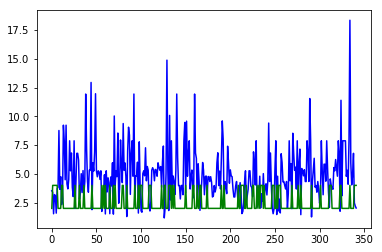

In [91]:
plt.plot(res.predict(x_test), color="b")
plt.plot(y_test, color='g')

In [92]:
oddsratio = np.exp(res.params)
print(oddsratio)
ret = mean_confidence_interval(oddsratio)
print(ret[0], ret[1])
print("Confidence Interval:", ret[0], "+-", ret[1])

[1.02058537 0.96941343 0.99070979 0.99925564 1.04416867 0.99249029
 1.06496433 0.98921074 1.01685367]
1.0097391023806819 0.023092992855758332
Confidence Interval: 1.0097391023806819 +- 0.023092992855758332


In [93]:
glm2 = sm.GLM(y_train, x_train, family=sm.families.Binomial())

In [94]:
res = glm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  341
Model:                            GLM   Df Residuals:                      332
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 29 Oct 2019   Deviance:                       49621.
Time:                        22:16:35   Pearson chi2:                 7.23e+18
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.833e+14   1.59e+06   5.56e+08      0.0

c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\statsmodels\genmod\families\family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00266596  0.          0.04545455]
 [ 0.          0.3030303  -0.25757576]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    30.2 ]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


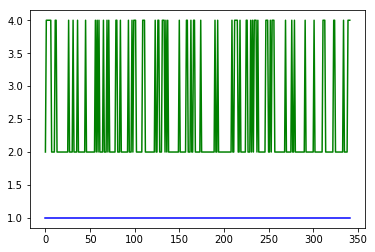

In [96]:
plt.plot(res.predict(x_test), color="b")
plt.plot(y_test, color='g')

In [97]:
glm3 = sm.GLM(y_train, x_train, family=sm.families.Poisson())

In [98]:
res = glm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  341
Model:                            GLM   Df Residuals:                      332
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -533.83
Date:                Tue, 29 Oct 2019   Deviance:                       73.359
Time:                        22:18:02   Pearson chi2:                     79.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0675      0.013      5.086      0.0

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00266596  0.          0.04545455]
 [ 0.          0.15007599 -0.14008444]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     20.575]
 [  0.    217.44   24.2  ]
 [  0.      0.      1.   ]]


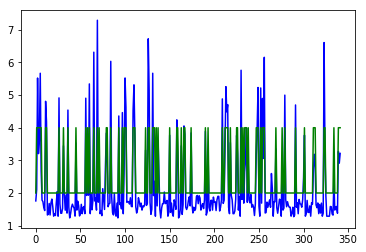

In [101]:
plt.plot(res.predict(x_test), color="b")
plt.plot(y_test, color='g')

In [65]:
oddsratio = np.exp(res.params)
print(oddsratio)
ret = mean_confidence_interval(oddsratio)
print(ret[0], ret[1])
print("Confidence Interval:", ret[0], "+-", ret[1])

[1.06986348 0.97385056 1.01422486 1.01277951 1.0429809  1.03000635
 1.05974277 1.0072103  1.00743552]
1.0242326951938416 0.022850207483013255
Confidence Interval: 1.0242326951938416 +- 0.022850207483013255


### From the output statistics, we see that deviance value is lower for Poisson, indicating it is a better fit than Gamma. Binomial with logit link gives nan. From the output statistics, we see that for Gamma, 9 iterationsa were required for convergence and log likelihood was -793, whereas in Poisson, the number of iterations required were just 5 and log likelihood was also higher -533. The lower table provides coefficients and p values and confidence intervals. Statistical significance at the 5% level is achieved by x1, x2, x5, x7, x8, x9 in Gamma and x1, x5, x6, x7 in Poisson. On comparing the odd ratios, we find that the nearly same mean and deviation is obtained in both cases. 